In [1]:
import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
file_name = 'SAheart.data'
data = pd.read_csv(file_name, sep=',', index_col=0)

In [4]:
data['famhist'] = data['famhist'] == 'Present'
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,True,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,False,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,True,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,True,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,True,60,25.99,57.34,49,1


In [5]:
n_test = int(math.ceil(len(data) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(data))), n_test)
train_ixs = [ix for ix in range(len(data)) if ix not in test_ixs]
train = data.iloc[train_ixs, :]
test = data.iloc[test_ixs, :]
print(len(train))
print(len(test))

323
139


In [6]:
features = ['adiposity', 'age']
response = 'chd'
x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [7]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [8]:
hidden_units = 10
activation = 'relu'
l2 = 0.01
learning_rate = 0.01
epochs = 5
batch_size = 16

In [9]:
model = models.Sequential()


model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation))


model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))


model.compile(loss='binary_crossentropy',

              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
21/21 [==============================] - 2s 4ms/step - loss: 0.6834 - accuracy: 0.5480
Epoch 2/10
21/21 [==============================] - 0s 7ms/step - loss: 0.6286 - accuracy: 0.6718
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6718
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6718
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.6718
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6718
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.6718
Epoch 8/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.6718
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.6718
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.6115
Training accuracy: 0.

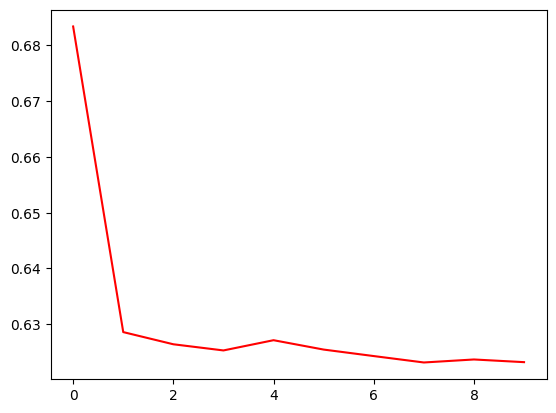

In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [11]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [12]:
test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:09<00:00,  2.00it/s]

Avgerage Training Accuracy: 0.6718266010284424
Avgerage Testing Accuracy: 0.6115108132362366


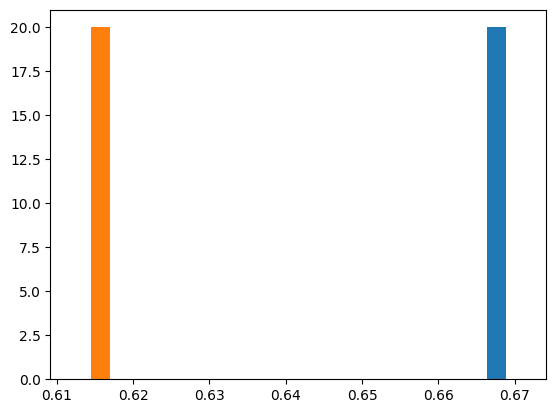

In [13]:
plt.hist(test_accs)
plt.show()

In [14]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.6115108132362366
Max: 0.6718266010284424


In [15]:
hidden_units = 10
activation = 'relu'
l2 = 0.01
learning_rate = 0.01
epochs = 5
batch_size = 16

In [16]:
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [17]:
train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:11<00:00,  1.79it/s]

Avgerage Training Accuracy: 0.6589783221483231
Avgerage Testing Accuracy: 0.6169064819812775


([0.6718266010284424,
  0.6718266010284424,
  0.6718266010284424,
  0.6656346917152405,
  0.6625387072563171,
  0.6656346917152405,
  0.6625387072563171,
  0.6594427227973938,
  0.6594427227973938,
  0.6656346917152405,
  0.6656346917152405,
  0.6594427227973938,
  0.6501547694206238,
  0.6532507538795471,
  0.6501547694206238,
  0.6532507538795471,
  0.6501547694206238,
  0.6470588445663452,
  0.6408668756484985,
  0.6532507538795471],
 [0.6115108132362366,
  0.6115108132362366,
  0.6115108132362366,
  0.6115108132362366,
  0.6115108132362366,
  0.6115108132362366,
  0.6115108132362366,
  0.6187050342559814,
  0.6187050342559814,
  0.6115108132362366,
  0.6115108132362366,
  0.6187050342559814,
  0.633093535900116,
  0.6187050342559814,
  0.6258992552757263,
  0.6187050342559814,
  0.6115108132362366,
  0.6258992552757263,
  0.6258992552757263,
  0.6187050342559814])